# Модуль 5. Решающие деревья

In [61]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import matplotlib.pyplot as plt
# import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# DATASET

In [21]:
digits = load_digits()

X = digits.data
y = digits.target

# digits.DESCR

# FUNCTIONS

In [30]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

# Сравнение логистической регрессии и случайного леса
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

# HOMEWORKS

### Задание 5.7.1

In [25]:
classifier = DecisionTreeClassifier()

scores = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
mean_score = scores.mean()

print("DecisionTreeClassifier", mean_score)

DecisionTreeClassifier 0.8263563004345127


### Задание 5.7.2

In [26]:
base_model = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_model, n_estimators=100)
bagging_scores = cross_val_score(bagging_classifier, X, y, cv=10, n_jobs=-1)
bagging_mean_score = bagging_scores.mean()

print("BaggingClassifier ", bagging_mean_score)

BaggingClassifier  0.9254003724394785


### Задание 5.7.3

In [27]:
base_model = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_model, n_estimators=100, max_features=int(np.sqrt(len(X))))
bagging_scores = cross_val_score(bagging_classifier, X, y, cv=10, n_jobs=-1)
bagging_mean_score = bagging_scores.mean()

print("BaggingClassifier sqrt", bagging_mean_score)

BaggingClassifier sqrt 0.9437771570453133


### Задание 5.7.4

In [33]:
random_tree  = DecisionTreeClassifier(max_features=int(np.sqrt(len(X))), max_depth=30)
bagging_classifier = BaggingClassifier(random_tree , n_estimators=100, max_features=int(np.sqrt(len(X))))
bagging_scores = cross_val_score(bagging_classifier, X, y, cv=10, n_jobs=-1)
bagging_mean_score = bagging_scores.mean()

print("Like Random Forest", bagging_mean_score)

Like Random Forest 0.945996275605214


### Задание 5.7.5

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest_scores = cross_val_score(random_forest, X, y, cv=10, n_jobs=-1)
random_forest_mean_score = random_forest_scores.mean()

print("RandomForestClassifier:", random_forest_mean_score)

RandomForestClassifier: 0.9493420235878336


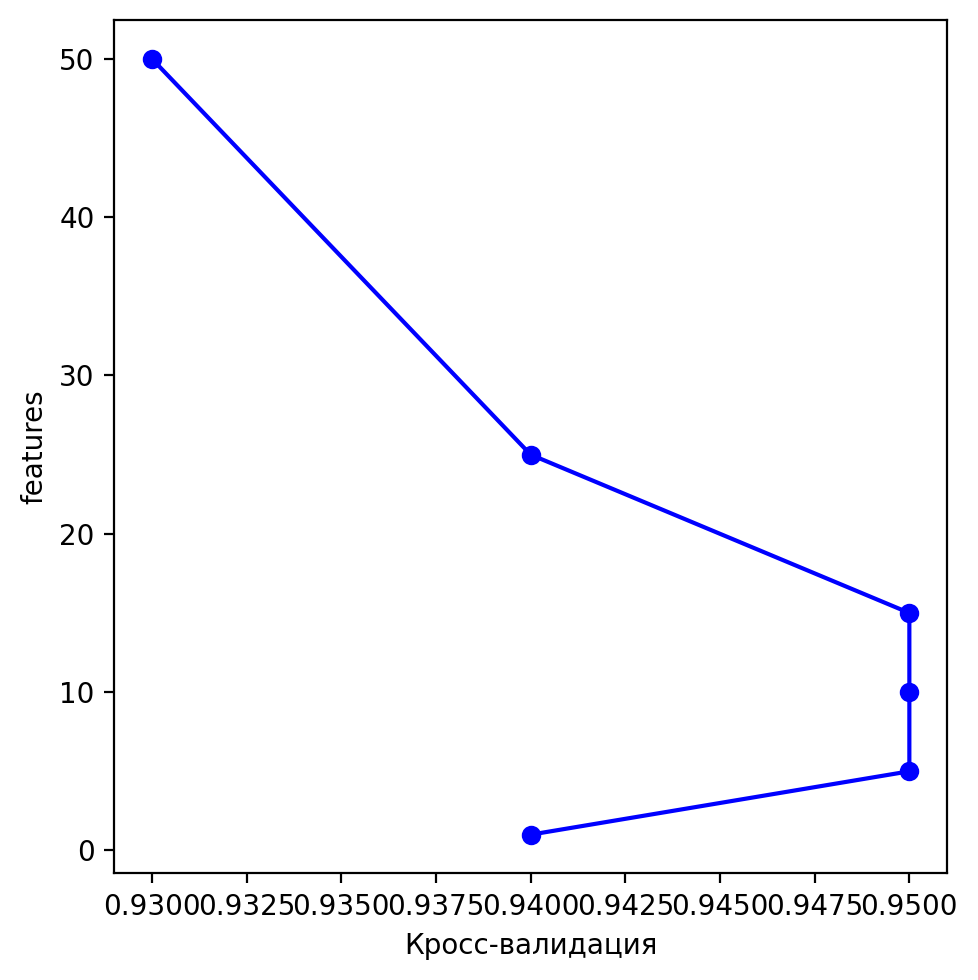

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

# max_features_list = ['auto', 'sqrt', 'log2'] # кол-во  признаков
max_features_list = [1, 5, 10, 15, 25, 50] # кол-во деревьев
max_features_list_x = []
for i, feature in enumerate(max_features_list):
    random_forest = RandomForestClassifier(n_estimators=100, max_features=feature)
    scores = cross_val_score(random_forest, X, y, cv=10, n_jobs=-1)
    mean_score = np.round(scores.mean(), 2)
    max_features_list_x.append(mean_score)
ax.plot(max_features_list_x, max_features_list, marker='o', linestyle='-', color='b')
ax.set_xlabel('Кросс-валидация')
ax.set_ylabel('features')
plt.tight_layout()
plt.show()

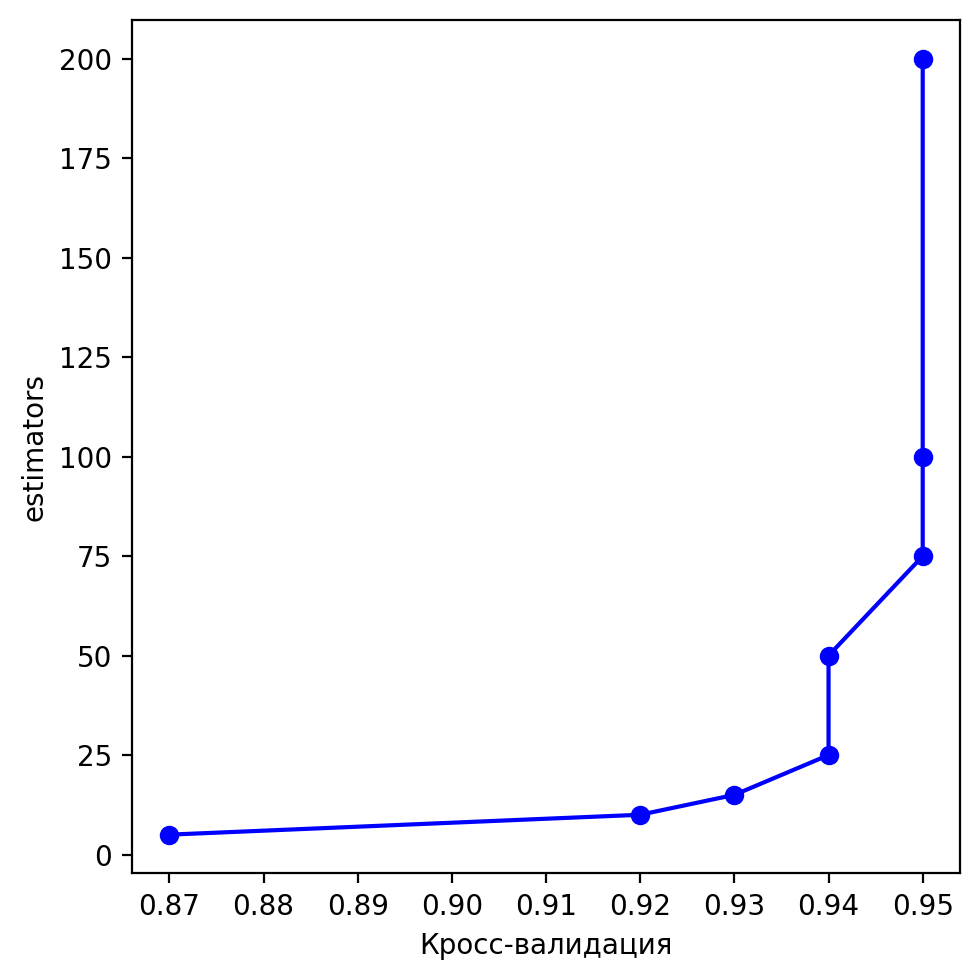

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

n_estimators_list = [5, 10, 15, 25, 50, 75, 100, 200] # кол-во деревьев
n_estimators_list_x = []
for i, estimator in enumerate(n_estimators_list):
    random_forest = RandomForestClassifier(n_estimators=estimator)
    scores = cross_val_score(random_forest, X, y, cv=10, n_jobs=-1)
    mean_score = np.round(scores.mean(), 2)
    n_estimators_list_x.append(mean_score)
ax.plot(n_estimators_list_x, n_estimators_list, marker='o', linestyle='-', color='b')
ax.set_xlabel('Кросс-валидация')
ax.set_ylabel('estimators')
plt.tight_layout()
plt.show()

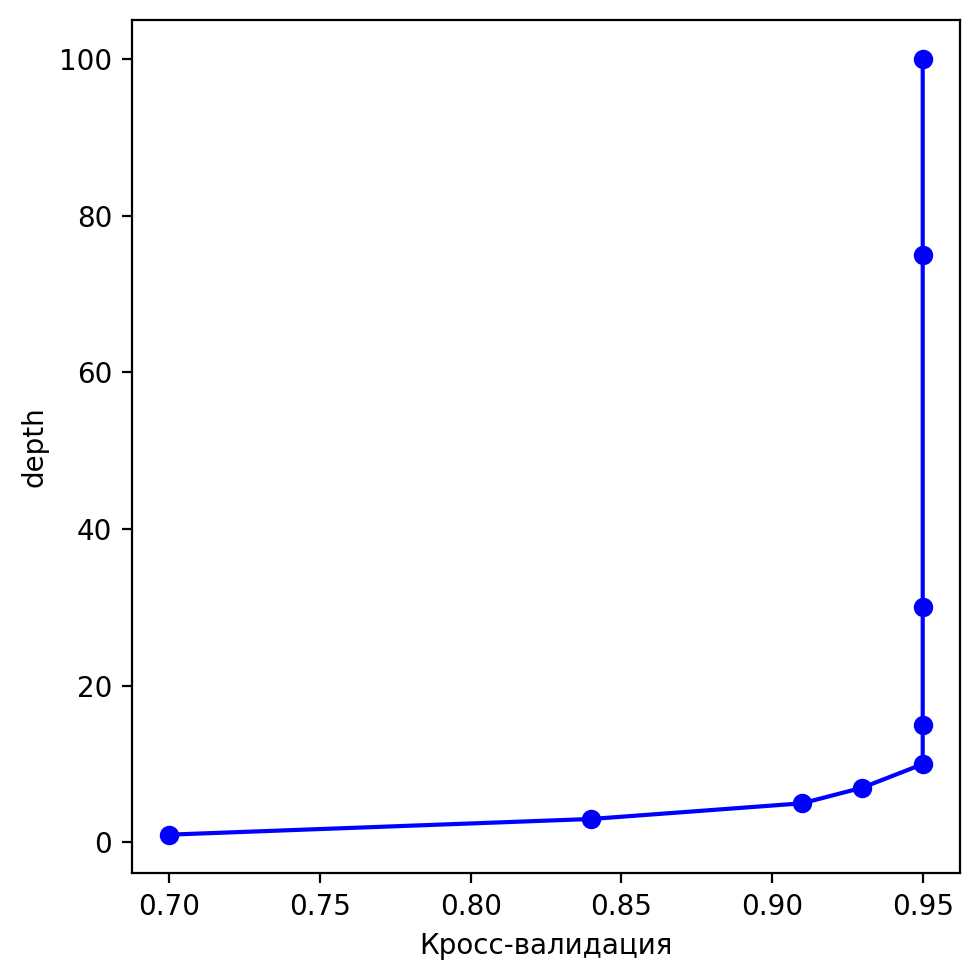

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

max_depth_list = [1, 3, 5, 7, 10, 15, 30, 75, 100] # ограничение глубины
max_depth_list_x = []
for i, max_depth in enumerate(max_depth_list):
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    scores = cross_val_score(random_forest, X, y, cv=10, n_jobs=-1)
    mean_score = np.round(scores.mean(), 2)
    max_depth_list_x.append(mean_score)
ax.plot(max_depth_list_x, max_depth_list, marker='o', linestyle='-', color='b')
ax.set_xlabel('Кросс-валидация')
ax.set_ylabel('depth')

plt.tight_layout()
plt.show()

### Задание 4.5.2 & Задание 4.6.3

In [9]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

y_pred = k_means.labels_.astype(int)
centroids = np.round(k_means.cluster_centers_).astype(int)
print(centroids)

[[-3 -3]
 [-2  6]
 [ 4  2]]


1320 938 742 

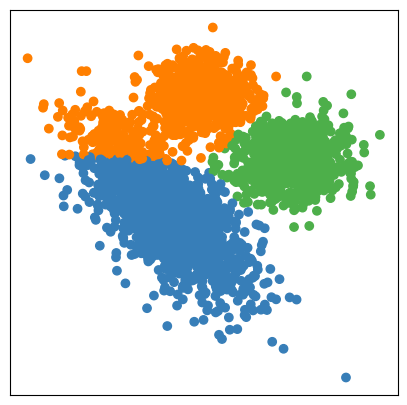

In [10]:
cluster_labels, cluster_counts = np.unique(y_pred, return_counts=True)
for count in cluster_counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.6.2 & Задание 4.6.3

[[ 4  2]
 [-2  7]
 [-4 -2]]


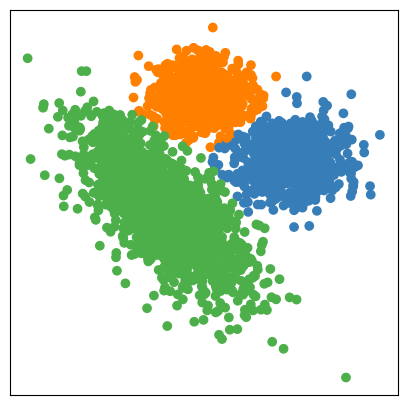

In [11]:
em_gm = GaussianMixture(n_components=3, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)

# print(em_gm.means_)
centroids = np.round(em_gm.means_).astype(int)
print(centroids)

plotResClasterization(X, y_pred)

In [12]:
unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

dict(zip(unique, counts))

744 763 1493 

{0: 744, 1: 763, 2: 1493}

### Задание 4.7.2 

Число листьев 3000


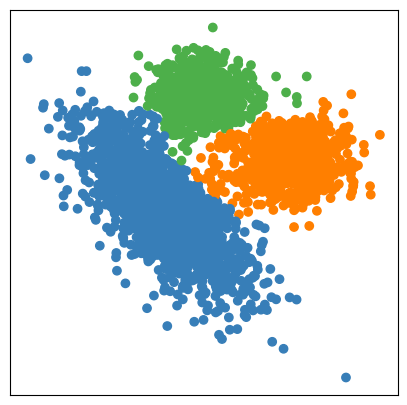

In [82]:
ac = AgglomerativeClustering(n_clusters=3) 
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)

# centroids = np.round(ac.labels_).astype(int)
# print(centroids)

# Определение числа листьев
n_leaves = len(ac.children_) + 1
print("Число листьев", n_leaves)

plotResClasterization(X, y_pred)

### Задание 4.7.3

In [14]:
unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

### Задание 4.7.4

1486 746 768 

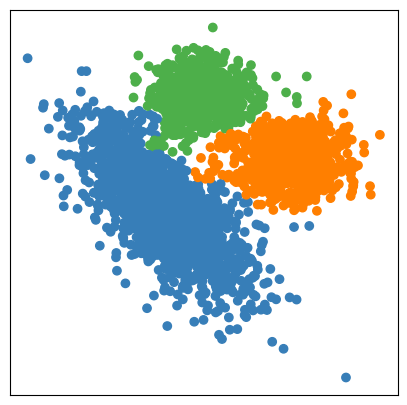

In [15]:
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity) 

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)

unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.7.5

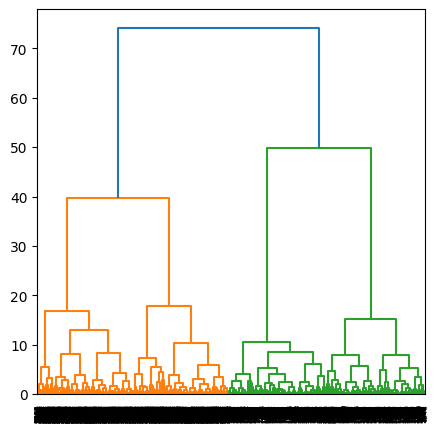

In [80]:
Z = linkage(X, "ward")
dendrogram(Z, leaf_rotation=90.)
plt.show()

### Задание 4.8.2 & Задание 4.8.3

{-1: 368, 0: 656, 1: 721, 2: 1255}


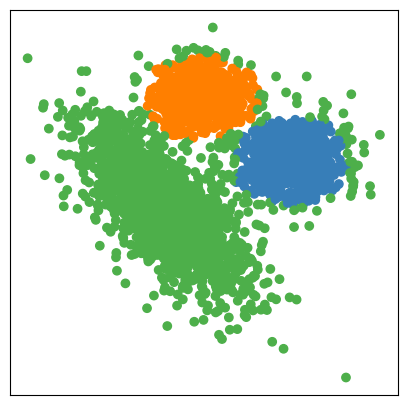

In [86]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

y_pred = DBSCAN_pred(X, 0.9, 35)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

plotResClasterization(X, y_pred)

### Задание 4.8.4

{-1: 583, 0: 603, 1: 681, 2: 1133}


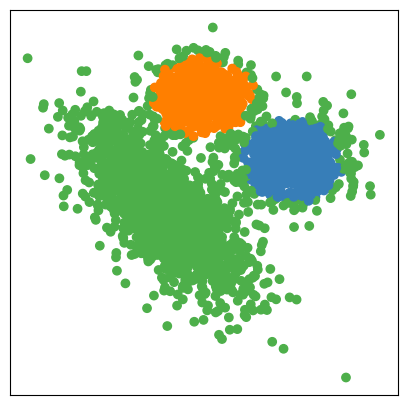

In [87]:
y_pred = DBSCAN_pred(X, 0.8, 35)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

plotResClasterization(X, y_pred)

### Задание 4.11.1

In [37]:
y_pred = GaussianMixture_pred(X, 3, 42)
print('GaussianMixture', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),1))

GaussianMixture 0.5


### Задание 4.11.3

In [33]:
def findNumberClusters(count):
    print(count)

    y_pred = KMeans_pred(X, count, 42)
    print('KMeans', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    y_pred = AgglomerativeClustering_pred(X, count)
    print('AgglomerativeClustering', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    y_pred = GaussianMixture_pred(X, count, 42)
    print('GaussianMixture', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    y_pred = DBSCAN_pred(X, 0.9, 35)
    print('DBSCAN', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    # k_means = KMeans(n_clusters=count, random_state=42)
    # k_means.fit(X)
    # y_pred = k_means.labels_.astype(int)
    # print('KMeans', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    # ac = AgglomerativeClustering(n_clusters=count) 
    # with warnings.catch_warnings():
    #     warnings.filterwarnings(
    #         "ignore",
    #         message="the number of connected components of the " +
    #         "connectivity matrix is [0-9]{1,2}" +
    #         " > 1. Completing it to avoid stopping the tree early.",
    #         category=UserWarning)
    #     ac.fit(X)
    # y_pred = ac.labels_.astype(int)
    # print('AgglomerativeClustering', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    # em_gm = GaussianMixture(n_components=count, random_state=42)
    # em_gm.fit(X)
    # y_pred = em_gm.predict(X)
    # print('GaussianMixture', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

In [34]:
for i in range(10-1):
    count = i + 2
    findNumberClusters(count)

2
KMeans 0.46
AgglomerativeClustering 0.41
GaussianMixture 0.46
DBSCAN 0.45
3
KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.5
DBSCAN 0.45
4
KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.51
DBSCAN 0.45
5
KMeans 0.48
AgglomerativeClustering 0.47
GaussianMixture 0.48
DBSCAN 0.45
6
KMeans 0.46
AgglomerativeClustering 0.44
GaussianMixture 0.46
DBSCAN 0.45
7
KMeans 0.4
AgglomerativeClustering 0.36
GaussianMixture 0.44
DBSCAN 0.45
8
KMeans 0.33
AgglomerativeClustering 0.35
GaussianMixture 0.33
DBSCAN 0.45
9
KMeans 0.33
AgglomerativeClustering 0.28
GaussianMixture 0.31
DBSCAN 0.45
10
KMeans 0.33
AgglomerativeClustering 0.28
GaussianMixture 0.31
DBSCAN 0.45


### Задание 4.12.1 Однородность

In [101]:
X_std = StandardScaler().fit_transform(X)
count = 3

y_pred = KMeans_pred(X_std, count, 42)
print('KMeans', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

y_pred = AgglomerativeClustering_pred(X_std, count)
print('AgglomerativeClustering', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

y_pred = GaussianMixture_pred(X_std, count, 42)
print('GaussianMixture', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

y_pred = DBSCAN_pred(X_std, 0.9, 35)
print('DBSCAN', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

KMeans 0.8
AgglomerativeClustering 0.91
GaussianMixture 0.93
DBSCAN 0.0


### Задание 4.13.1 & Задание 4.13.2 Полнота

In [89]:
count = 3

y_pred = KMeans_pred(X, count, 42)
print('KMeans', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

y_pred = AgglomerativeClustering_pred(X, count)
print('AgglomerativeClustering', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

y_pred = GaussianMixture_pred(X, count, 42)
print('GaussianMixture', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

y_pred = DBSCAN_pred(X, 0.9, 35)
print('DBSCAN', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

KMeans 0.78
AgglomerativeClustering 0.69
GaussianMixture 0.93
DBSCAN 0.7


### Задание 4.14.1 &  Задание 4.14.2 V-мера

In [64]:
y_pred = KMeans_pred_param(X, 3, 42, 'k-means++')
print('KMeans k-means+', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),2))

y_pred = KMeans_pred_param(X, 3, 42, 'random')
print('KMeans random', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),2))

KMeans k-means+ 0.79
KMeans random 0.79


### Задание 4.14.4

In [67]:
y_pred = KMeans_pred_param(X, 3, 42, 'k-means++')
print('KMeans', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),2))

y_pred = MiniBatchKMeans_pred(X, 3, 42)
print('MiniBatchKMeans_pred', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),2))

KMeans 0.79
MiniBatchKMeans_pred 0.75


### Задание 4.14.5

In [76]:
y_pred = AgglomerativeClustering_pred(X, count)
print('AgglomerativeClustering', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),1))

y_pred = AgglomerativeClustering_pred_param(X, count, 'euclidean', 'ward')
print('AgglomerativeClustering ward', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),1))

y_pred = AgglomerativeClustering_pred_param(X, count, 'euclidean', 'complete')
print('AgglomerativeClustering complete', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),1))

y_pred = AgglomerativeClustering_pred_param(X, count, 'euclidean', 'average')
print('AgglomerativeClustering average', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),1))

y_pred = AgglomerativeClustering_pred_param(X, count, 'euclidean', 'single')
print('AgglomerativeClustering single', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),1))

AgglomerativeClustering 0.9
AgglomerativeClustering ward 0.9
AgglomerativeClustering complete 0.6
AgglomerativeClustering average 0.7
AgglomerativeClustering single 0.0


### Задание 4.14.6

In [78]:
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity) 

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)
print('AgglomerativeClustering connectivity', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),1))

AgglomerativeClustering connectivity 0.9


### Задание 4.14.7

In [90]:
y_pred = DBSCAN_pred(X, 0.9, 35)
print('DBSCAN', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),2))

y_pred = DBSCAN_pred(X, 0.8, 35)
print('DBSCAN', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),2))

DBSCAN 0.77
DBSCAN 0.71


### Задание 4.14.8

In [94]:
model = DBSCAN(eps=0.9, min_samples=35)
model.fit(X)
y_pred = model.labels_

# Получение индексов основных и граничных объектов (исключая выбросы)
core_samples_mask = np.zeros_like(y_pred, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
non_outliers_mask = (y_pred != -1)

# Вычисление v-меры только для основных и граничных объектов
v_measure = v_measure_score(y[non_outliers_mask], y_pred[non_outliers_mask])
print('V-мера для основных и граничных объектов:', np.round(v_measure, 2))

V-мера для основных и граничных объектов: 0.97


### Задание 4.14.9 & Задание 4.14.10

In [100]:
X, y = ds_X()
count = 3
round = 2

y_pred = AgglomerativeClustering_pred(X, count)
print('AgglomerativeClustering', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),round))

X_std = StandardScaler().fit_transform(X)
y_pred = AgglomerativeClustering_pred(X_std, count)
print('AgglomerativeClustering std', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),round))

X_minmax = MinMaxScaler().fit_transform(X)
y_pred = AgglomerativeClustering_pred(X_minmax, count)
print('AgglomerativeClustering minmax', np.round(v_measure_score(labels_true=y, labels_pred=y_pred),round))

AgglomerativeClustering 0.7
AgglomerativeClustering std 0.91
AgglomerativeClustering minmax 0.89
